## Introduction

This colab notebook is used as a means to analyze the prepared data from my [Colab Data Preparation Notebook](https://github.com/varelandrew/Seattle-Weather/blob/main/Andrew%20Varela%20DATA%203320%20Seattle%20St.%20Louis%20Data%20Preparation%20Template.ipynb) sourced from https://www.ncei.noaa.gov/cdo-web/search?datasetid=GHCND for Seattle and St. Louis weather. The question that I am trying to answer is whether it rains more in Seattle, Washington than St. Louis, Missouri. I will be stating any questions, analyzing the results, and concluding with a statement based on my findings.

If you would like to dive deeper into the specific data sets used, here are links to the resources located in my Github.
- [Seattle Data](https://github.com/varelandrew/Seattle-Weather/blob/main/seattle_rain.csv)
- [St. Louis Data](https://github.com/varelandrew/Seattle-Weather/blob/main/stl_rain.csv)

## Import libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno
import calendar

## Load clean data

##### $\rightarrow$ Load the clean data set from Github. 

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/varelandrew/Seattle-Weather/main/clean_seattle_stl_weather.csv')

##### $\rightarrow$ Review the contents of the data set.

In [3]:
df

,date,city,precipitation,day_of_year,month,year
0,2018-01-01,STL,0.00,1,1,2018
1,2018-01-02,STL,0.00,2,1,2018
2,2018-01-03,STL,0.00,3,1,2018
3,2018-01-04,STL,0.00,4,1,2018
4,2018-01-05,STL,0.00,5,1,2018
...,...,...,...,...,...,...
3647,2022-12-27,SEA,0.78,361,12,2022
3648,2022-12-28,SEA,0.40,362,12,2022
3649,2022-12-29,SEA,0.03,363,12,2022
3650,2022-12-30,SEA,0.62,364,12,2022


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           3652 non-null   object 
 1   city           3652 non-null   object 
 2   precipitation  3652 non-null   float64
 3   day_of_year    3652 non-null   int64  
 4   month          3652 non-null   int64  
 5   year           3652 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 171.3+ KB


## State your questions

The overall problem is to compare how much it rains in Seattle and St. Louis. To answer this general problem, you will need to ask specific questions about the data.


##### $\rightarrow$ List your questions about the data that will help you solve the problem.

1. What does it mean by more rain?
2. Are there more days that it rains in Seattle or St. Louis?
3. When it rains does it rain more in Seattle or St. Louis?

## Analysis

When looking at the clean data set the biggest question that I needed to answer was what does it mean by more rain? We have a precipitation value that shows how much it rained in inches per day from 2018 to 2022. So to define more rain, I look at it two different ways. The first is total amount of days that it rains, and the second is the total amount of rain from the days that it rained.

So to now answer this question, I need to graph the data to visually see which city coorelates to which definition of rain or maybe even both definitions.

The steps to create the first plot consists of grouping the data by city and month and then calculating the count of precipitation days by the grouped value. With that data I then proceeded to create a bar plot which I believe showcases the difference in precipitation days the best for viewers.

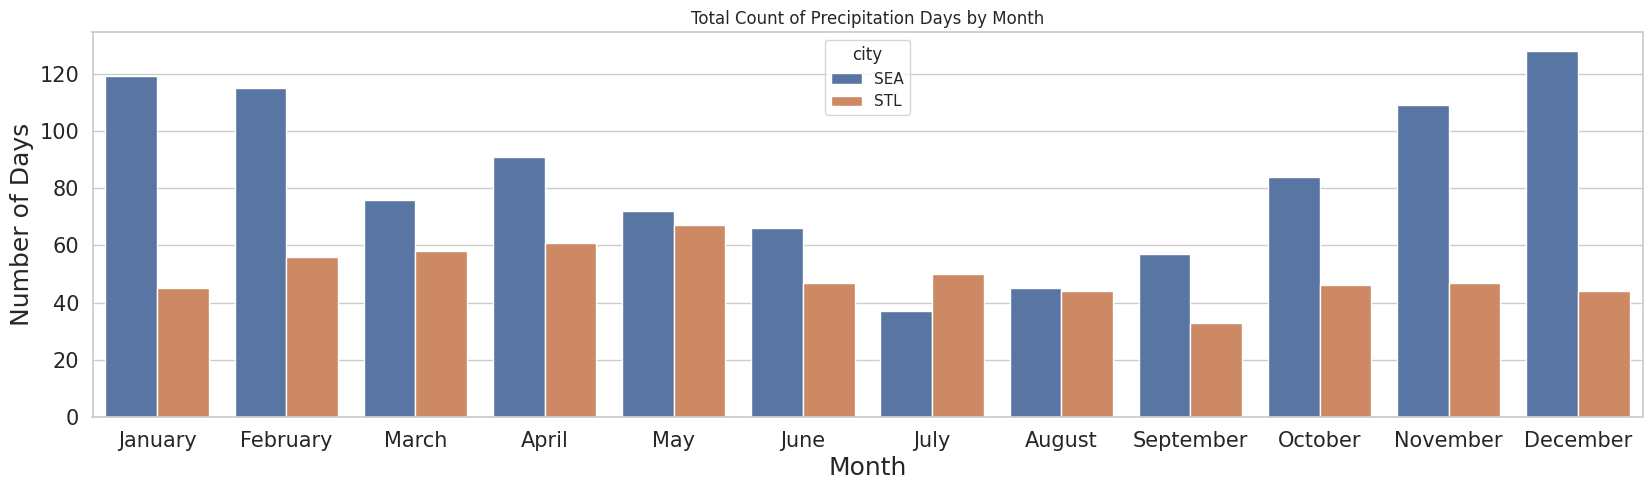

In [23]:
plt.figure(figsize=(20,5))

grouped_by_city_month = df.groupby(['city', 'month'])

rainy_days = grouped_by_city_month['precipitation'].apply(lambda x: (x > 0).sum()).reset_index(name='rainy_days')

sns.barplot(data=rainy_days, x='month', y='rainy_days', hue='city')

plt.xticks(ticks=range(12), labels=[calendar.month_name[i+1] for i in range(12)])

plt.title('Total Count of Precipitation Days by Month')
plt.xlabel('Month', fontsize=18)
plt.ylabel('Number of Days', fontsize=18)

plt.tick_params(labelsize=15);

What is outputted here is a total count of days that it rained from 2018-2022 by month for both Seattle and St. Louis. As you can see here it rained more days in Seattle for every month other than July where St. Louis received more days of rain. 

The steps to create the second plot consists of creating a new data frame with precipitation values that are greater than 0 which means it rained that day. I then grouped the data frame by city and then calculated the sum of all precipitation values for days that it rained. Again I plotted in a bar chart as I am only plotting two values and it makes it easy to distinguish the difference between the two.

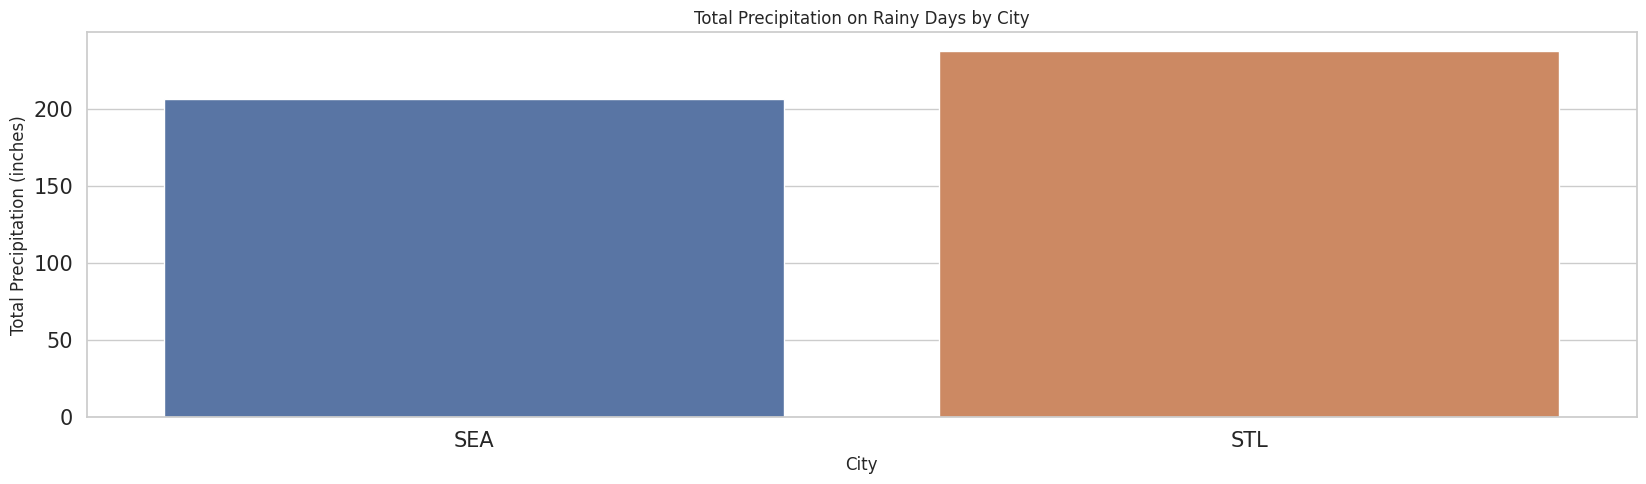

In [21]:
plt.figure(figsize=(20,5))

df_rainy_days = df[df['precipitation'] > 0]

grouped_by_city = df_rainy_days.groupby('city')

total_precipitation = grouped_by_city['precipitation'].sum().reset_index()

sns.barplot(data=total_precipitation, x='city', y='precipitation')

plt.title('Total Precipitation on Rainy Days by City')
plt.xlabel('City')
plt.ylabel('Total Precipitation (inches)')

plt.tick_params(labelsize=15);

What is outputted here is the total value of precipitation in inches from every day that rained from 2018-2022 in Seattle and St. Louis. Here you can see that St. Louis had approximately 40 more total inches of rain between 2018-2022.

The steps to create the last plot consisted of plotting the original data discerned by city where sns.barplot automatically took the mean value of precipitation for the whole data set and plotted it by month with error bars to showcase a range of values that aren't reflected as it is a mean value.

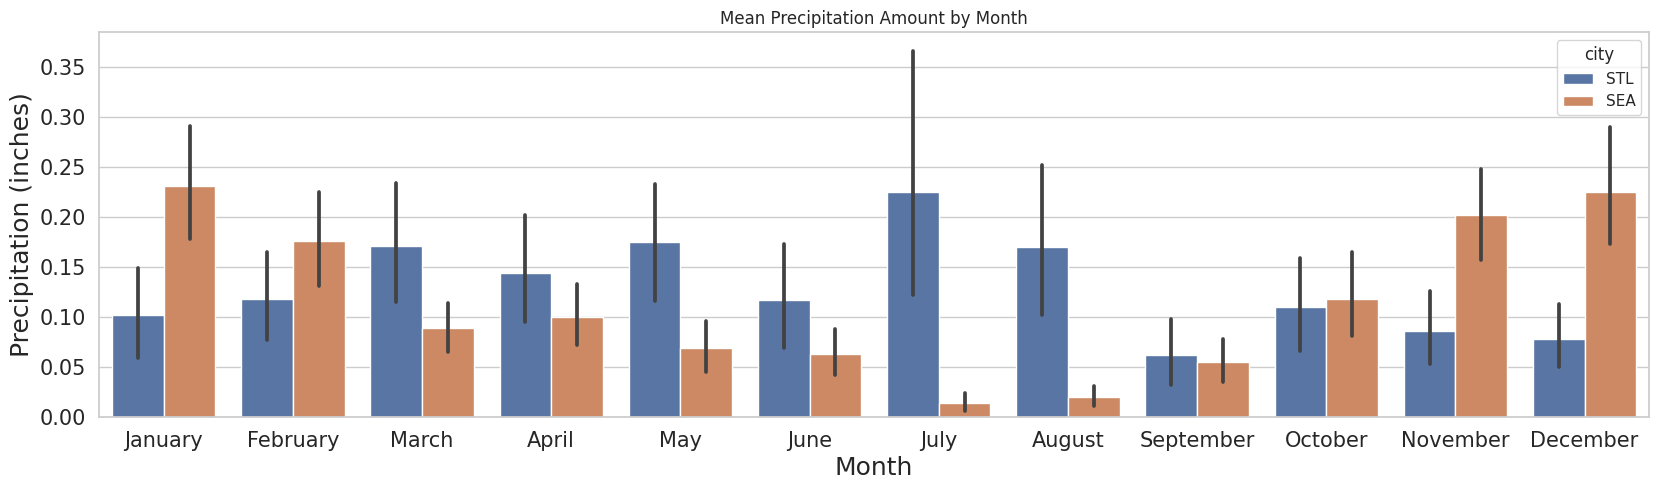

In [22]:
plt.figure(figsize=(20,5))

sns.barplot(data=df, x='month', y='precipitation', hue='city')

plt.xticks(ticks=range(12), labels=[calendar.month_name[i+1] for i in range(12)])

plt.title('Mean Precipitation Amount by Month')
plt.xlabel('Month', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15);

What is outputted here is the mean precipitation amount from 2018-2022 by each month for both Seattle and St. Louis. You can see here that it rained from the days that there were rain on average more from the months of March-September which is 7 out of the 12 total months. But the beginning and ending months it rained more in Seattle than it did in St. Louis.

## Results for communication assignment

My results for the communication assignment are to use the above 3 graphs in my report that will help me to answer the original question of the project which is to discover if it rains in Seattle, Washington more than St. Louis, Missouri. The result is that depending on what the definition of "more rain" is then either Seattle or St. Louis fits under the category of "more rain". Which is why I split the definition of "more rain" into two where it counts as total amount of days that it rained and total amount of rain produced from the days that it rained.

## Conclusion

From analyzing all of the plots I created it seems that based on my definition of "more rain", St. Louis and Seattle both fall under one of the categories. The plots show that Seattle has a total of more days where it actually rained throughout 2018-2022, but St. Louis had more precipitation in total from the days that had rain from 2018-2022.